# ...

https://www.youtube.com/watch?v=VMj-3S1tku0

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
def f(x):
    return 3*x**2 + - 4*x + 5

In [5]:
f(3.0)

20.0

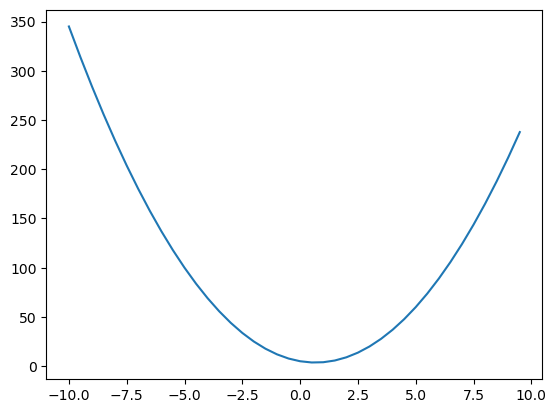

In [6]:
xs = np.arange(-10, 10, 0.5)
ys = f(xs) # works because it's a np array ?!?

plt.plot(xs, ys)

In [7]:
# approximation de la pente
h = 0.000001
x = 3 # try with other numbers, -3, 2/4, etc.

(f(x + h) - f(x)) / h # ~ 14, la dérivée de 3x^^2 - 4x + 5 est 6x - 4, donc pour 3 → 14

14.000003002223593

In [8]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [19]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [9]:
# Manually derive :)

h = 0.00001
d1 = a * b + c
# updating a
a += h
d2 = a * b + c

print("slope is ", (d2 - d1) / h)

slope is  -3.000000000064062


In [22]:
class Value:
    
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data}, label='{self.label}')"
    
    def __add__(self, other):
        return Value(self.data + other.data, _children=(self, other), _op="+")
    
    def __mul__(self, other):
        return Value(self.data * other.data,  _children=(self, other), _op="*")

In [24]:
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")
d = a * b; d.label = "d"
e = d + c; e.label = "e"
f = Value(-2.0, label="f")
L = d * f; L.label="L"
print(e)
print(e._prev)
print(e._op)

Value(data=4.0, label='e')
{Value(data=-6.0, label='d'), Value(data=10.0, label='c')}
+


In [27]:
# For visualisation, see the graphviz code used in the video
# FIXME missing graphviz binaries!
## draw_dot(L)

# STOPPED AT 35